# Weather Data Prediction 
### This notebook uses a Ridge regression model to predict high and low temperatures of data from May 2023 to July 2024.

## Import Libraries and Data

In [189]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()

# Read the CSV file into Pandas DataFrame
df = pd.read_csv("Weather_data_2023_2024.csv", parse_dates=True, index_col="datetime")

## Data Exploration

In [190]:
# Drop columns of no interest
df = df[['location', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility']]

In [191]:
# Check for missing values
df.isnull().sum()

location            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
dtype: int64

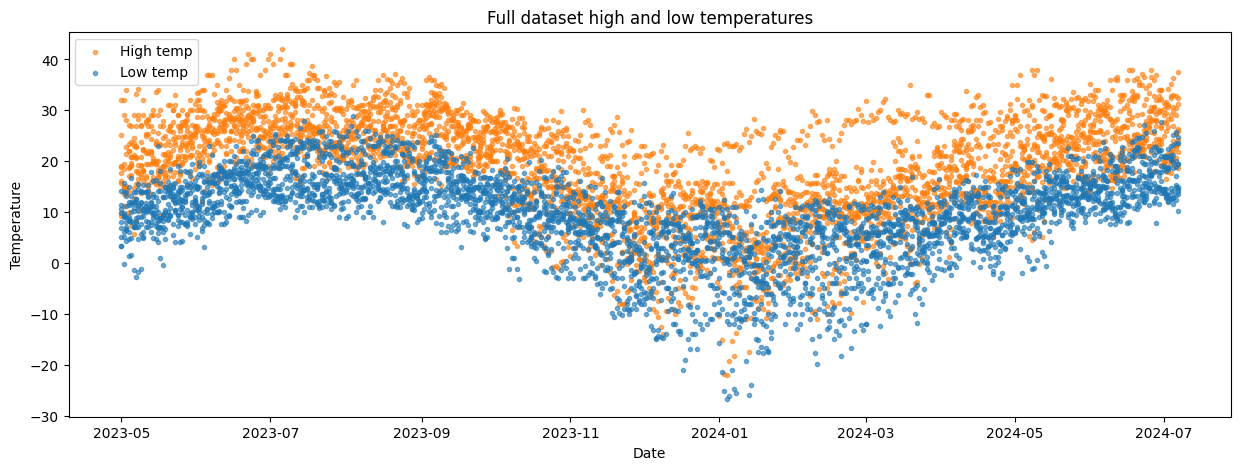

In [192]:
# Plot the tempmax and tempmin columns
fig, ax = plt.subplots(figsize=(15, 5))
plt.scatter(df.index, df['tempmax'], color=color_pal[1], label='High temp', alpha=0.6, marker='.')
plt.scatter(df.index, df['tempmin'], color=color_pal[0], label='Low temp', alpha=0.6, marker='.')

# Add titles and labels
plt.title('Full dataset high and low temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


## Train / Test Split 

In [193]:
# Split training and testing data by dates
train = df.loc[df.index < '2024-03-01']
validate = df.loc[(df.index >= '2024-03-01') & (df.index < '2024-04-13')]
test = df.loc[df.index >= '2024-04-13']

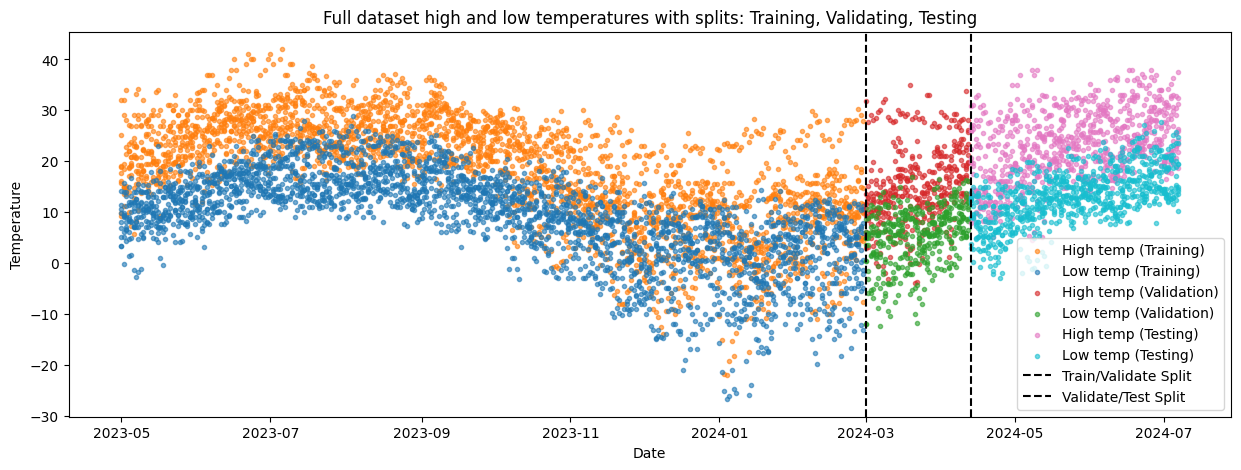

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and has a datetime index

# Define split dates
train_end_date = pd.to_datetime('2024-03-01')
validate_end_date = pd.to_datetime('2024-04-13')
test_start_date = pd.to_datetime('2024-04-13')

# Split the data into before and after the split date
train = df.loc[df.index < train_end_date]
validate = df.loc[(df.index >= train_end_date) & (df.index < validate_end_date)]
test = df.loc[df.index >= test_start_date]

# Create the scatter plot
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the tempmax and tempmin columns for training data
plt.scatter(train.index, train['tempmax'], color=color_pal[1], label='High temp (Training)', alpha=0.6, marker='.')
plt.scatter(train.index, train['tempmin'], color=color_pal[0], label='Low temp (Training)', alpha=0.6, marker='.')

# Plot the tempmax and tempmin columns for validation data
plt.scatter(validate.index, validate['tempmax'], color=color_pal[3], label='High temp (Validation)', alpha=0.6, marker='.')
plt.scatter(validate.index, validate['tempmin'], color=color_pal[2], label='Low temp (Validation)', alpha=0.6, marker='.')

# Plot the tempmax and tempmin columns for testing data
plt.scatter(test.index, test['tempmax'], color=color_pal[6], label='High temp (Testing)', alpha=0.6, marker='.')
plt.scatter(test.index, test['tempmin'], color=color_pal[9], label='Low temp (Testing)', alpha=0.6, marker='.')

# Add titles and labels
plt.title('Full dataset high and low temperatures with splits: Training, Validating, Testing')
plt.xlabel('Date')
plt.ylabel('Temperature')

# Add vertical lines to mark the splits
ax.axvline(train_end_date, color='black', ls='--', label='Train/Validate Split')
ax.axvline(validate_end_date, color='black', ls='--', label='Validate/Test Split')

# Add legend
plt.legend()

# Show the plot
plt.show()


## Feature Selection

In [195]:
# Significant features from ANOVA test
FEATURES_MAX = ['temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility']
FEATURES_MIN = ['temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'sealevelpressure', 'cloudcover', 'visibility']

# Define targets for tempmax and tempmin
TARGET_MAX = 'tempmax'
TARGET_MIN = 'tempmin'

# Model building

## Perform cross-validation on time series data - Evaluating Model Performance

## Hyperparameter tuning to improve model performance

- Best parameters for TempMax: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
- Best R² score for TempMax: 0.9783273812876363
- TempMax - MAE: 0.4230343137254893
- TempMax - MSE: 0.48120152777777675
- TempMax - RMSE: 0.6936869090431048
- TempMax - R²: 0.9865487323650098
----------------------------
- Best parameters for TempMin: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
- Best R² score for TempMin: 0.9641035642889235
- TempMin - MAE: 0.3853105063292871
- TempMin - MSE: 0.3332533905519906
- TempMin - RMSE: 0.5772810325586583
- TempMin - R²: 0.9837596200687451

## Confirm Hyperparameter tuning Best Parameters

Tempmax

In [196]:
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Best parameters for TempMax: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 30, 'bootstrap': True}
# Best parameters for TempMin: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 20, 'bootstrap': True}

# Define a more refined parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_features': [None],
    'max_depth': [20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Define the features and targets from training data
X_train_max = train[FEATURES_MAX]
y_train_max = train[TARGET_MAX]
X_train_min = train[FEATURES_MIN]
y_train_min = train[TARGET_MIN]

# Scaling features
scaler_max = StandardScaler()
X_train_max_scaled = scaler_max.fit_transform(X_train_max)

scaler_min = StandardScaler()
X_train_min_scaled = scaler_min.fit_transform(X_train_min)

# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV for TempMax
random_search_max = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                       n_iter=50, cv=tscv, verbose=2, n_jobs=-1, scoring='r2')

# Fit RandomizedSearchCV for TempMax
random_search_max.fit(X_train_max_scaled, y_train_max)

# Print the best parameters and best score for TempMax
print("Best parameters for TempMax:", random_search_max.best_params_)
print("Best R² score for TempMax:", random_search_max.best_score_)

# Train the final model with the best parameters on the entire training data for TempMax
rf_max = RandomForestRegressor(**random_search_max.best_params_, random_state=42)
rf_max.fit(X_train_max_scaled, y_train_max)

# Define the features from testing data (no scaling here as it's used only for final evaluation)
X_test_max = test[FEATURES_MAX]
y_test_max = test[TARGET_MAX]
X_test_max_scaled = scaler_max.transform(X_test_max)

# Predict on the test set for TempMax
y_pred_max = rf_max.predict(X_test_max_scaled)

# Calculate evaluation metrics for TempMax
mae_max = mean_absolute_error(y_test_max, y_pred_max)
mse_max = mean_squared_error(y_test_max, y_pred_max)
rmse_max = np.sqrt(mse_max)
r2_max = r2_score(y_test_max, y_pred_max)

print(f"TempMax - MAE: {mae_max}")
print(f"TempMax - MSE: {mse_max}")
print(f"TempMax - RMSE: {rmse_max}")
print(f"TempMax - R²: {r2_max}")

# Initialize RandomizedSearchCV for TempMin
random_search_min = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                       n_iter=50, cv=tscv, verbose=2, n_jobs=-1, scoring='r2')

# Fit RandomizedSearchCV for TempMin
random_search_min.fit(X_train_min_scaled, y_train_min)

# Print the best parameters and best score for TempMin
print("Best parameters for TempMin:", random_search_min.best_params_)
print("Best R² score for TempMin:", random_search_min.best_score_)

# Train the final model with the best parameters on the entire training data for TempMin
rf_min = RandomForestRegressor(**random_search_min.best_params_, random_state=42)
rf_min.fit(X_train_min_scaled, y_train_min)

# Define the features from testing data (no scaling here as it's used only for final evaluation)
X_test_min = test[FEATURES_MIN]
y_test_min = test[TARGET_MIN]
X_test_min_scaled = scaler_min.transform(X_test_min)

# Predict on the test set for TempMin
y_pred_min = rf_min.predict(X_test_min_scaled)

# Calculate evaluation metrics for TempMin
mae_min = mean_absolute_error(y_test_min, y_pred_min)
mse_min = mean_squared_error(y_test_min, y_pred_min)
rmse_min = np.sqrt(mse_min)
r2_min = r2_score(y_test_min, y_pred_min)

print(f"TempMin - MAE: {mae_min}")
print(f"TempMin - MSE: {mse_min}")
print(f"TempMin - RMSE: {rmse_min}")
print(f"TempMin - R²: {r2_min}")


/home/ahzof/hw_ds/.venv/lib/python3.10/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total 

/home/ahzof/hw_ds/.venv/lib/python3.10/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=20, max_featu

Best R² score for TempMax: 0.96626233299227
TempMax - MAE: 0.4275904031512544
TempMax - MSE: 0.5109059126036972
TempMax - RMSE: 0.7147768271311663
TempMax - R²: 0.9887175423200616

Best R² score for TempMin: 0.9565867079438328
TempMin - MAE: 0.424770592880124
TempMin - MSE: 0.38282499784222135
TempMin - RMSE: 0.6187285332374945
TempMin - R²: 0.9859891925523022

### 1. Cross-Validation on Training Data

In [197]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42, **random_search_max.best_params_)

# Define TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Perform cross-validation
cv_scores_max = cross_val_score(rf, X_train_max_scaled, y_train_max, cv=tscv, scoring='r2')
cv_scores_min = cross_val_score(rf, X_train_min_scaled, y_train_min, cv=tscv, scoring='r2')

# Print cross-validation scores
print(f"TempMax - Cross-Validation R² Scores: {cv_scores_max}")
print(f"TempMin - Cross-Validation R² Scores: {cv_scores_min}")

# Print mean and standard deviation of cross-validation scores
print(f"TempMax - Mean CV R² Score: {cv_scores_max.mean()}")
print(f"TempMax - Standard Deviation of CV R² Score: {cv_scores_max.std()}")

print(f"TempMin - Mean CV R² Score: {cv_scores_min.mean()}")
print(f"TempMin - Standard Deviation of CV R² Score: {cv_scores_min.std()}")


TempMax - Cross-Validation R² Scores: [0.99298084 0.99512014 0.97437058 0.99557165 0.99667638]
TempMin - Cross-Validation R² Scores: [0.97083563 0.96558375 0.97987361 0.99734471 0.99338455]
TempMax - Mean CV R² Score: 0.9909439183660448
TempMax - Standard Deviation of CV R² Score: 0.008373079672025987
TempMin - Mean CV R² Score: 0.981404452387965
TempMin - Standard Deviation of CV R² Score: 0.01234465777720364


### 2. Evaluate on Validation and Test Data

In [198]:
from sklearn.preprocessing import StandardScaler

# Define the features and targets from validation data
X_validate_max = validate[FEATURES_MAX]
y_validate_max = validate[TARGET_MAX]
X_validate_min = validate[FEATURES_MIN]
y_validate_min = validate[TARGET_MIN]

# Scaling features (if necessary)
scaler_max = StandardScaler()
X_train_max_scaled = scaler_max.fit_transform(X_train_max)
X_test_max_scaled = scaler_max.transform(X_test_max)
X_validate_max_scaled = scaler_max.transform(X_validate_max)  # Scale validation data

scaler_min = StandardScaler()
X_train_min_scaled = scaler_min.fit_transform(X_train_min)
X_test_min_scaled = scaler_min.transform(X_test_min)
X_validate_min_scaled = scaler_min.transform(X_validate_min)  # Scale validation data

# Initialize RandomForestRegressor
rf_max = RandomForestRegressor(random_state=42, **random_search_max.best_params_)
rf_min = RandomForestRegressor(random_state=42, **random_search_min.best_params_)

# Fit on the entire training data
rf_max.fit(X_train_max_scaled, y_train_max)
rf_min.fit(X_train_min_scaled, y_train_min)

# Predict on the validation and test sets
y_pred_validate_max = rf_max.predict(X_validate_max_scaled)
y_pred_test_max = rf_max.predict(X_test_max_scaled)

y_pred_validate_min = rf_min.predict(X_validate_min_scaled)
y_pred_test_min = rf_min.predict(X_test_min_scaled)

# Calculate evaluation metrics for validation and test sets
mae_validate_max = mean_absolute_error(y_validate_max, y_pred_validate_max)
mse_validate_max = mean_squared_error(y_validate_max, y_pred_validate_max)
rmse_validate_max = np.sqrt(mse_validate_max)
r2_validate_max = r2_score(y_validate_max, y_pred_validate_max)

mae_test_max = mean_absolute_error(y_test_max, y_pred_test_max)
mse_test_max = mean_squared_error(y_test_max, y_pred_test_max)
rmse_test_max = np.sqrt(mse_test_max)
r2_test_max = r2_score(y_test_max, y_pred_test_max)

mae_validate_min = mean_absolute_error(y_validate_min, y_pred_validate_min)
mse_validate_min = mean_squared_error(y_validate_min, y_pred_validate_min)
rmse_validate_min = np.sqrt(mse_validate_min)
r2_validate_min = r2_score(y_validate_min, y_pred_validate_min)

mae_test_min = mean_absolute_error(y_test_min, y_pred_test_min)
mse_test_min = mean_squared_error(y_test_min, y_pred_test_min)
rmse_test_min = np.sqrt(mse_test_min)
r2_test_min = r2_score(y_test_min, y_pred_test_min)

# Print validation and test metrics
print(f"TempMax - Validation MAE: {mae_validate_max}")
print(f"TempMax - Validation MSE: {mse_validate_max}")
print(f"TempMax - Validation RMSE: {rmse_validate_max}")
print(f"TempMax - Validation R²: {r2_validate_max}")

print(f"TempMax - Test MAE: {mae_test_max}")
print(f"TempMax - Test MSE: {mse_test_max}")
print(f"TempMax - Test RMSE: {rmse_test_max}")
print(f"TempMax - Test R²: {r2_test_max}")

print(f"TempMin - Validation MAE: {mae_validate_min}")
print(f"TempMin - Validation MSE: {mse_validate_min}")
print(f"TempMin - Validation RMSE: {rmse_validate_min}")
print(f"TempMin - Validation R²: {r2_validate_min}")

print(f"TempMin - Test MAE: {mae_test_min}")
print(f"TempMin - Test MSE: {mse_test_min}")
print(f"TempMin - Test RMSE: {rmse_test_min}")
print(f"TempMin - Test R²: {r2_test_min}")



TempMax - Validation MAE: 0.21061757105943504
TempMax - Validation MSE: 0.20298876744186078
TempMax - Validation RMSE: 0.45054274762985674
TempMax - Validation R²: 0.9963572165132895
TempMax - Test MAE: 0.17820801033592024
TempMax - Test MSE: 0.18127171963824296
TempMax - Test RMSE: 0.42576016680549505
TempMax - Test R²: 0.9959969331829311
TempMin - Validation MAE: 0.5651007751937996
TempMin - Validation MSE: 0.7000848837209306
TempMin - Validation RMSE: 0.8367107527221881
TempMin - Validation R²: 0.9777479998701183
TempMin - Test MAE: 0.1531950904392812
TempMin - Test MSE: 0.14232609431524545
TempMin - Test RMSE: 0.37726130773675354
TempMin - Test R²: 0.9947910833580005


- TempMax seems less prone to overfitting as the test R² score is very close to the validation R² score, and the metrics are quite consistent.
- TempMin shows a larger discrepancy between validation and test metrics. This might indicate some overfitting to the validation data or possible data drift in the test set.

### Visualize Overfitting

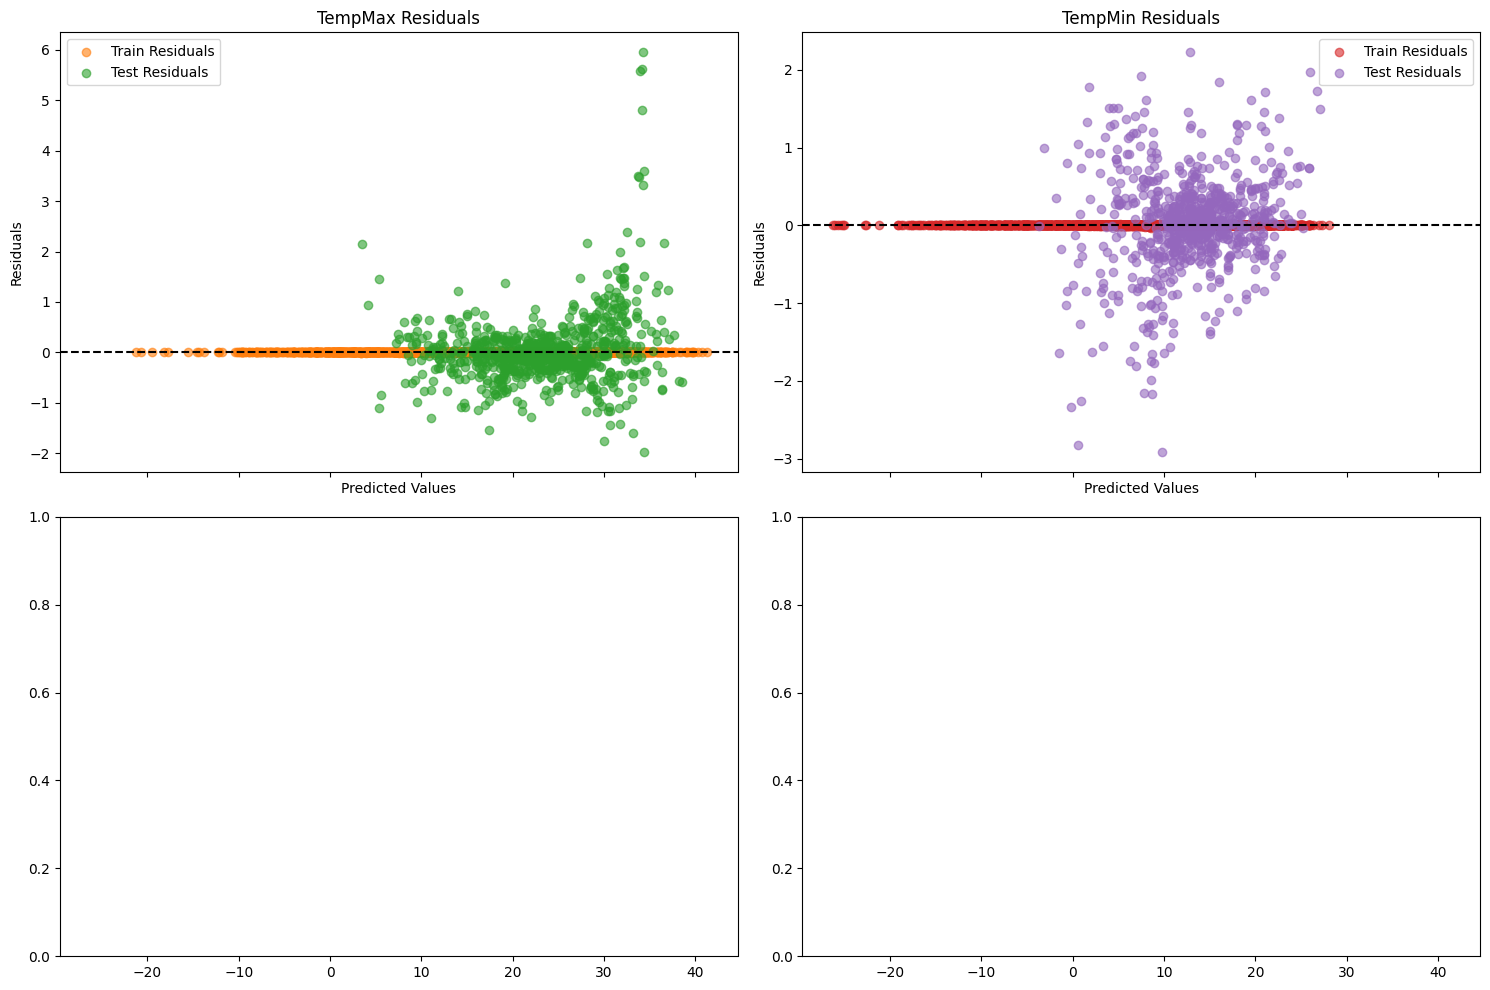

In [199]:
#  Visualize Residuals

# Plot residuals with enhancements
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)

# TempMax Residuals
axes[0, 0].scatter(rf_max.predict(X_train_max_scaled), train_residuals_max, color=color_pal[1], alpha=0.6, label='Train Residuals')
axes[0, 0].scatter(y_pred_max, test_residuals_max, color=color_pal[2], alpha=0.6, label='Test Residuals')
axes[0, 0].axhline(0, color='black', ls='--')
axes[0, 0].set_title('TempMax Residuals')
axes[0, 0].set_xlabel('Predicted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].legend()

# TempMin Residuals
axes[0, 1].scatter(rf_min.predict(X_train_min_scaled), train_residuals_min, color=color_pal[3], alpha=0.6, label='Train Residuals')
axes[0, 1].scatter(y_pred_min, test_residuals_min, color=color_pal[4], alpha=0.6, label='Test Residuals')
axes[0, 1].axhline(0, color='black', ls='--')
axes[0, 1].set_title('TempMin Residuals')
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].legend()

fig.tight_layout()
plt.show()



### Plot Learning Curve

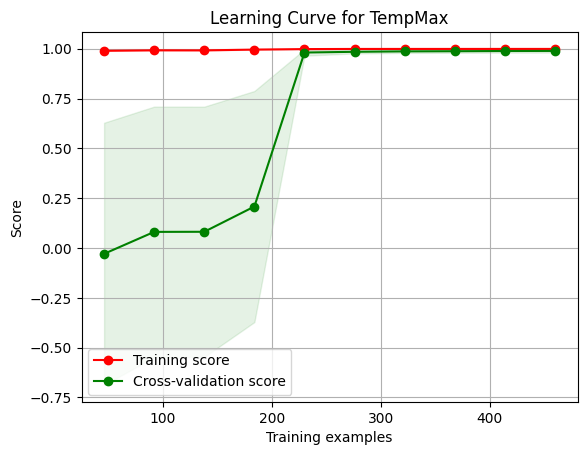

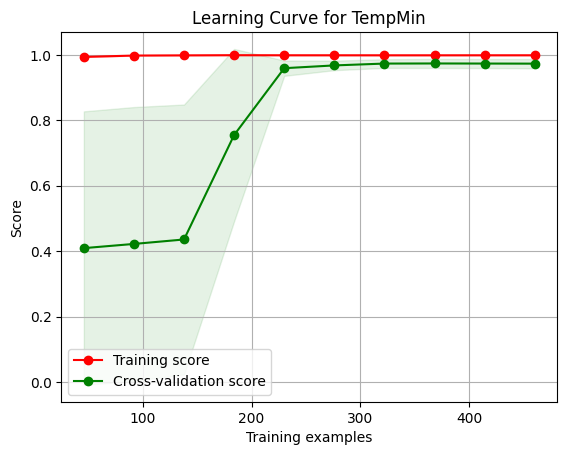

Training TempMax - MAE: 0.10606193078324727
Training TempMax - MSE: 0.04385831693989073
Training TempMax - RMSE: 0.20942377357857614
Training TempMax - R²: 0.9995986034521864
Training TempMin - MAE: 0.12529726775956682
Training TempMin - MSE: 0.05931696867030964
Training TempMin - RMSE: 0.24355075173423227
Training TempMin - R²: 0.999243918176856


In [200]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv, n_jobs):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve for TempMax
plot_learning_curve(rf_max, "Learning Curve for TempMax", X_train_max_scaled, y_train_max, cv=tscv, n_jobs=-1)
plt.show()

# Plot learning curve for TempMin
plot_learning_curve(rf_min, "Learning Curve for TempMin", X_train_min_scaled, y_train_min, cv=tscv, n_jobs=-1)
plt.show()

# Compare training and test scores
train_pred_max = rf_max.predict(X_train_max_scaled)
train_mae_max = mean_absolute_error(y_train_max, train_pred_max)
train_mse_max = mean_squared_error(y_train_max, train_pred_max)
train_rmse_max = np.sqrt(train_mse_max)
train_r2_max = r2_score(y_train_max, train_pred_max)

print(f"Training TempMax - MAE: {train_mae_max}")
print(f"Training TempMax - MSE: {train_mse_max}")
print(f"Training TempMax - RMSE: {train_rmse_max}")
print(f"Training TempMax - R²: {train_r2_max}")

train_pred_min = rf_min.predict(X_train_min_scaled)
train_mae_min = mean_absolute_error(y_train_min, train_pred_min)
train_mse_min = mean_squared_error(y_train_min, train_pred_min)
train_rmse_min = np.sqrt(train_mse_min)
train_r2_min = r2_score(y_train_min, train_pred_min)

print(f"Training TempMin - MAE: {train_mae_min}")
print(f"Training TempMin - MSE: {train_mse_min}")
print(f"Training TempMin - RMSE: {train_rmse_min}")
print(f"Training TempMin - R²: {train_r2_min}")


## Checking tempmax and tempmin Residuals

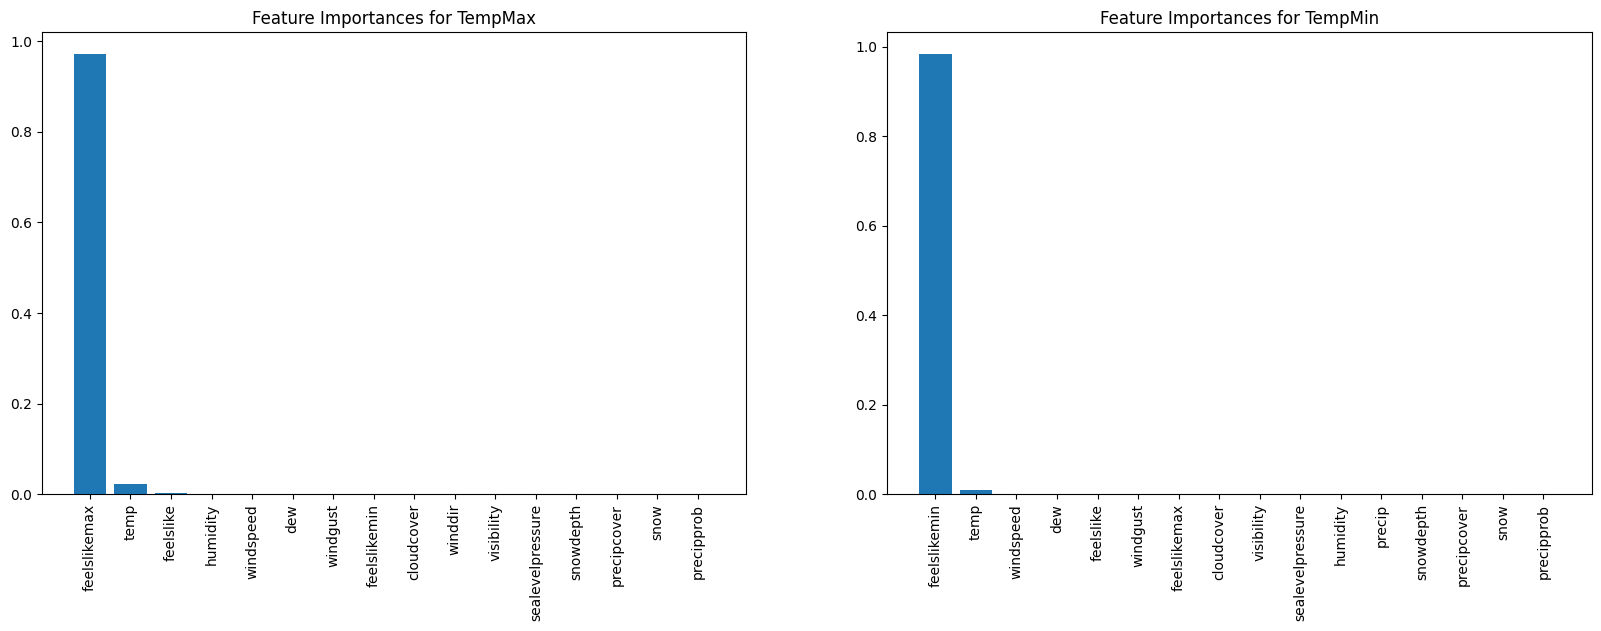

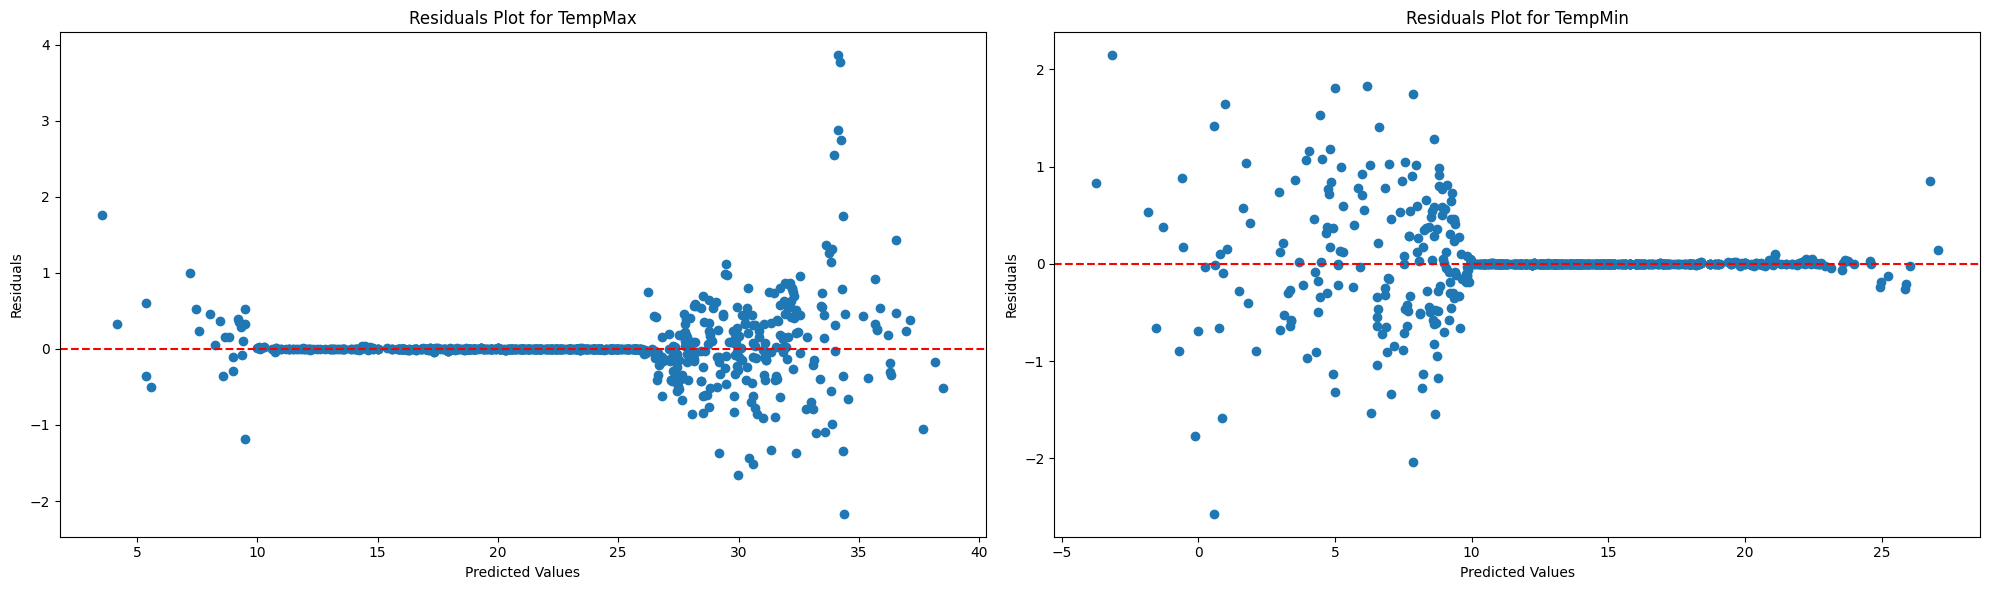

In [201]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming rf_max and rf_min are your fitted models and FEATURES_MAX and FEATURES_MIN are defined

# Feature importance for TempMax
importances_max = rf_max.feature_importances_
indices_max = np.argsort(importances_max)[::-1]
feature_names_max = FEATURES_MAX

# Feature importance for TempMin
importances_min = rf_min.feature_importances_
indices_min = np.argsort(importances_min)[::-1]
feature_names_min = FEATURES_MIN

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot feature importances for TempMax
axes[0].bar(range(X_train_max.shape[1]), importances_max[indices_max])
axes[0].set_xticks(range(X_train_max.shape[1]))
axes[0].set_xticklabels([feature_names_max[i] for i in indices_max], rotation=90)
axes[0].set_title("Feature Importances for TempMax")

# Plot feature importances for TempMin
axes[1].bar(range(X_train_min.shape[1]), importances_min[indices_min])
axes[1].set_xticks(range(X_train_min.shape[1]))
axes[1].set_xticklabels([feature_names_min[i] for i in indices_min], rotation=90)
axes[1].set_title("Feature Importances for TempMin")

# Calculate residuals for TempMax
residuals_max = y_test_max - y_pred_max

# Calculate residuals for TempMin
residuals_min = y_test_min - y_pred_min

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot residuals for TempMax
axes[0].scatter(y_pred_max, residuals_max)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals Plot for TempMax')

# Plot residuals for TempMin
axes[1].scatter(y_pred_min, residuals_min)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals Plot for TempMin')

# Adjust layout
plt.tight_layout()
plt.show()

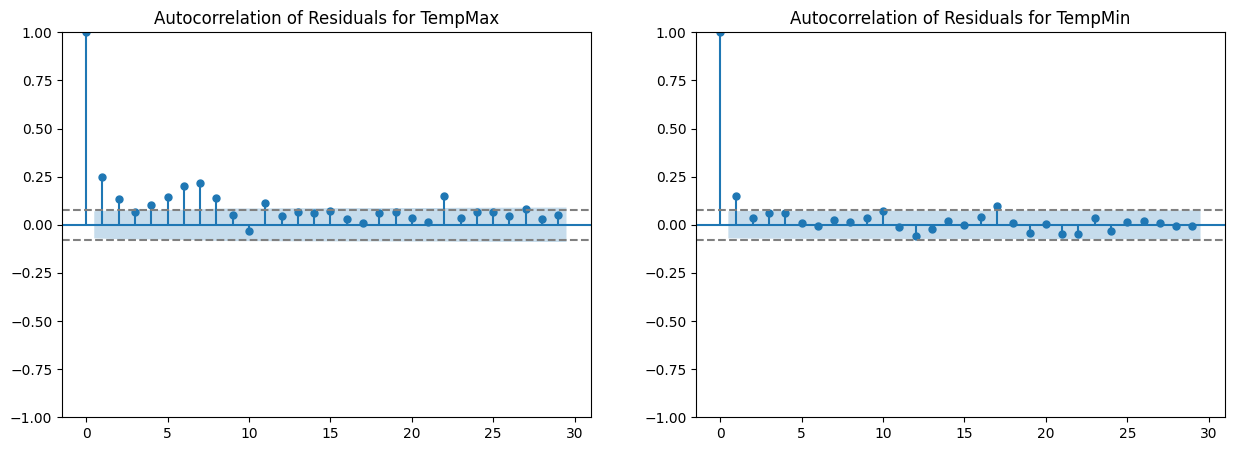

In [202]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import numpy as np

# Calculate the confidence interval
n = 612
confidence_interval = 1.96 / np.sqrt(n)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot autocorrelation for TempMax residuals
plot_acf(residuals_max, ax=axes[0])
axes[0].set_title('Autocorrelation of Residuals for TempMax')

# Plot autocorrelation for TempMin residuals
plot_acf(residuals_min, ax=axes[1])
axes[1].set_title('Autocorrelation of Residuals for TempMin')

# Add confidence interval lines
for ax in axes:
    ax.axhline(y=confidence_interval, linestyle='--', color='gray')
    ax.axhline(y=-confidence_interval, linestyle='--', color='gray')

# Show the plots
plt.show()


## Address Autocorrelation

## Analysis / Presentation of Results

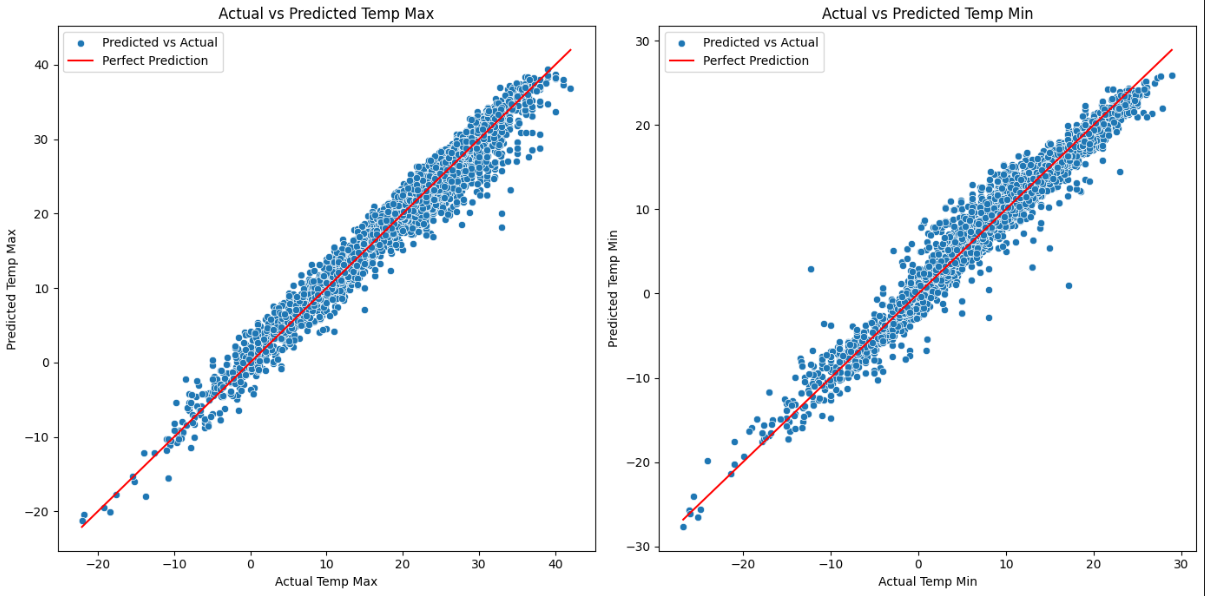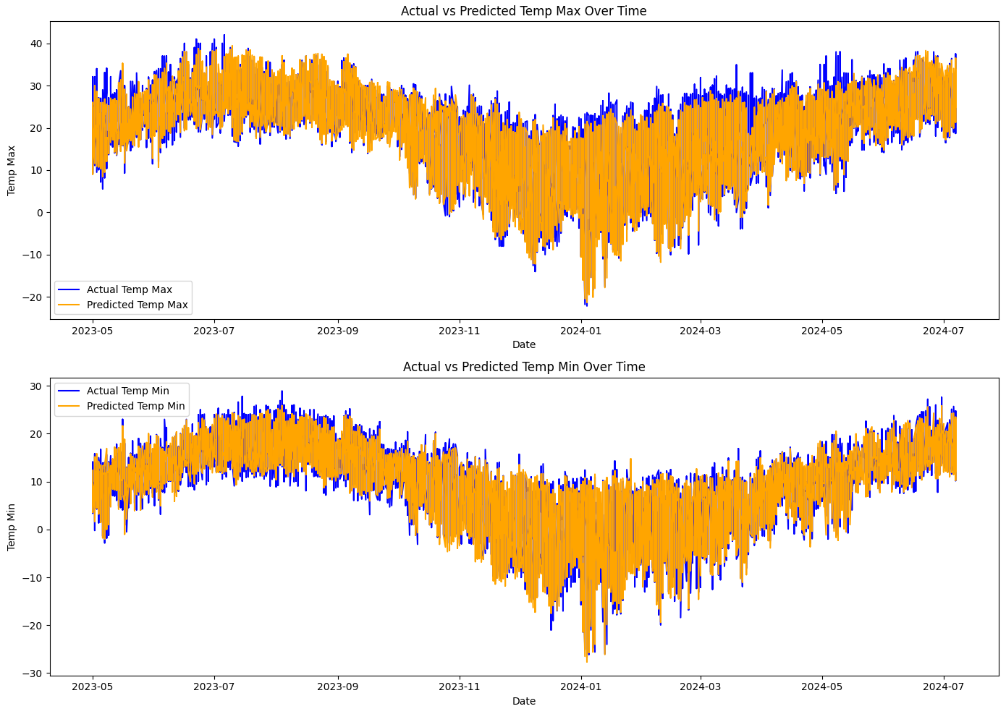

## Store Results

# Calculate metrics to check prediction accuracy

# Calculate PICP (prediction interval coverage probability) to determine model reliability